# HOUSE PRICE PREDICTION

### Objective

The primary objective of this project is to develop a regression model that predicts house prices based on various features of the properties. The model will analyze the relationships between the features and the target variable, which is the price of the house. By accurately predicting house prices, the model can assist buyers, sellers, and real estate professionals in making informed decisions.

### Data Description

The dataset consists of 14,619 records, each representing a unique house listing with various attributes. Here’s a breakdown of the features in the dataset:

1. **id**: Unique identifier for each house listing.
2. **Date**: An integer representing the date of the listing (this may need to be converted into a datetime format for better analysis).
3. **number of bedrooms**: Total count of bedrooms in the house (integer).
4. **number of bathrooms**: Total count of bathrooms, which may include fractional values (float).
5. **living area**: Size of the living area in square feet (integer).
6. **lot area**: Size of the lot on which the house is built, typically in square feet (integer).
7. **number of floors**: Count of floors in the house (float).
8. **waterfront present**: Binary indicator (0 or 1) showing whether the property is located on a waterfront.
9. **number of views**: Total count of views the property has received (integer).
10. **condition of the house**: A rating or score indicating the overall condition of the house (integer).
11. **grade of the house**: A rating or score that reflects the quality of the house (integer).
12. **Area of the house (excluding basement)**: Size of the main living area, excluding the basement (integer).
13. **Area of the basement**: Size of the basement (integer).
14. **Built Year**: Year the house was constructed (integer).
15. **Renovation Year**: Year of the most recent renovation (integer).
16. **Postal Code**: Postal code indicating the location of the house (integer).
17. **Lattitude**: Latitude coordinate of the house's location (float).
18. **Longitude**: Longitude coordinate of the house's location (float).
19. **living_area_renov**: Size of the living area after renovation (integer).
20. **lot_area_renov**: Size of the lot area after renovation (integer).
21. **Number of schools nearby**: Count of schools in the vicinity (integer).
22. **Distance from the airport**: Distance to the nearest airport, likely in miles or kilometers (integer).
23. **Price**: Target variable indicating the selling price of the house (this is the hese steps or need further assistance, feel free to ask!

#### IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectKBest

import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import xgboost as xgb

import joblib

In [2]:
df=pd.read_csv("House Price India.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [4]:
df.head(10)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
5,6762813157,42491,5,3.25,3660,11995,2.0,0,2,3,...,2006,0,122008,52.7637,-114.050,3320,11241,3,72,785000
6,6762813599,42491,3,1.75,2240,10578,2.0,0,0,5,...,1923,0,122006,52.9254,-114.482,1570,10578,3,71,750000
7,6762813600,42491,3,2.50,2390,6550,1.0,0,2,4,...,1955,0,122009,52.8014,-114.598,2010,6550,1,73,750000
8,6762814461,42491,4,2.25,2200,11250,1.5,0,0,5,...,1920,0,122010,52.9145,-114.391,2320,10814,2,53,698000
9,6762814787,42491,5,2.50,2820,67518,2.0,0,0,3,...,1979,0,122011,52.8094,-114.215,2820,48351,2,51,675000


In [5]:
df.drop("Date",axis=1,inplace=True)

In [6]:
df.drop("id",axis=1,inplace=True)

In [7]:
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,4,2.50,3310,42998,2.0,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [8]:
df["number of floors"] = df["number of floors"].astype(int)


In [9]:
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,4,2.50,2920,4000,1,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,5,2.75,2910,9480,1,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,4,2.50,3310,42998,2,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,3,2.00,2710,4500,1,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,3,2.50,2600,4750,1,0,0,4,9,1700,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [10]:
df["number of bathrooms"] = df["number of bathrooms"].astype(int)

In [11]:
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,4,2,2920,4000,1,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,5,2,2910,9480,1,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,4,2,3310,42998,2,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,3,2,2710,4500,1,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,3,2,2600,4750,1,0,0,4,9,1700,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


#### ### HANDLING NULL VALUES

In [12]:

df.isna().sum().sum()

0

#### HANDLING DUPLICATE VALUES

In [13]:

df.duplicated().sum()

0

In [14]:
i=df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

## FEATURE SELECTION

In [16]:
X = df.drop("Price",axis=1)
Y=df.Price

#### SELECT K-BEST METHOD

In [17]:
test = SelectKBest(k=10)
fit=test.fit(X,Y)

In [18]:
print(fit.scores_)

[1.59109661 3.02262644 7.13296897 0.90761359 1.48498636 1.91955738
 1.8920217  1.0438608  6.73045318 4.69806462 1.68863627 1.18758852
 1.05564994 1.7659174  3.11462375 1.04290453 4.75803688 0.79182768
 0.97089434 1.00652461]


In [19]:
features={
    "features":X.columns,
    "score":fit.scores_}
features=pd.DataFrame(features)


In [20]:
features.sort_values(by="score",ascending=False)

,features,score
2,living area,7.132969
8,grade of the house,6.730453
16,living_area_renov,4.758037
9,Area of the house(excluding basement),4.698065
14,Lattitude,3.114624
1,number of bathrooms,3.022626
5,waterfront present,1.919557
6,number of views,1.892022
13,Postal Code,1.765917
10,Area of the basement,1.688636


#### pps matrix method

In [21]:
!pip install ppscore

In [22]:
import ppscore as pps

In [23]:
pp=pps.matrix(df)

In [24]:
pp=pp[pp["y"]=="Price"]


In [25]:
pp

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
20,number of bedrooms,Price,0.011143,regression,True,mean absolute error,219446.8094,217001.466903,DecisionTreeRegressor()
41,number of bathrooms,Price,0.095333,regression,True,mean absolute error,219446.8094,198526.261918,DecisionTreeRegressor()
62,living area,Price,0.193488,regression,True,mean absolute error,219446.8094,176986.455372,DecisionTreeRegressor()
83,lot area,Price,0.000000,regression,True,mean absolute error,219446.8094,280052.985554,DecisionTreeRegressor()
104,number of floors,Price,0.000000,regression,True,mean absolute error,219446.8094,219500.396342,DecisionTreeRegressor()
125,waterfront present,Price,0.000000,regression,True,mean absolute error,219446.8094,228399.955424,DecisionTreeRegressor()
146,number of views,Price,0.003503,regression,True,mean absolute error,219446.8094,218678.184397,DecisionTreeRegressor()
167,condition of the house,Price,0.000000,regression,True,mean absolute error,219446.8094,230092.827992,DecisionTreeRegressor()
188,grade of the house,Price,0.266186,regression,True,mean absolute error,219446.8094,161033.035166,DecisionTreeRegressor()
209,Area of the house(excluding basement),Price,0.114484,regression,True,mean absolute error,219446.8094,194323.600704,DecisionTreeRegressor()


In [26]:
pp.sort_values(by="ppscore",ascending=False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
440,Price,Price,1.000000,predict_itself,True,None,0.0000,1.000000,None
293,Postal Code,Price,0.267074,regression,True,mean absolute error,219446.8094,160838.163766,DecisionTreeRegressor()
188,grade of the house,Price,0.266186,regression,True,mean absolute error,219446.8094,161033.035166,DecisionTreeRegressor()
62,living area,Price,0.193488,regression,True,mean absolute error,219446.8094,176986.455372,DecisionTreeRegressor()
356,living_area_renov,Price,0.118359,regression,True,mean absolute error,219446.8094,193473.283918,DecisionTreeRegressor()
209,Area of the house(excluding basement),Price,0.114484,regression,True,mean absolute error,219446.8094,194323.600704,DecisionTreeRegressor()
41,number of bathrooms,Price,0.095333,regression,True,mean absolute error,219446.8094,198526.261918,DecisionTreeRegressor()
20,number of bedrooms,Price,0.011143,regression,True,mean absolute error,219446.8094,217001.466903,DecisionTreeRegressor()
146,number of views,Price,0.003503,regression,True,mean absolute error,219446.8094,218678.184397,DecisionTreeRegressor()
167,condition of the house,Price,0.000000,regression,True,mean absolute error,219446.8094,230092.827992,DecisionTreeRegressor()


#### VIF METHOD

In [27]:
rename={}
for column in df.columns:
    list = column.split()
    name="_".join(list)
    rename[column]=name

In [28]:
rename

{'number of bedrooms': 'number_of_bedrooms',
 'number of bathrooms': 'number_of_bathrooms',
 'living area': 'living_area',
 'lot area': 'lot_area',
 'number of floors': 'number_of_floors',
 'waterfront present': 'waterfront_present',
 'number of views': 'number_of_views',
 'condition of the house': 'condition_of_the_house',
 'grade of the house': 'grade_of_the_house',
 'Area of the house(excluding basement)': 'Area_of_the_house(excluding_basement)',
 'Area of the basement': 'Area_of_the_basement',
 'Built Year': 'Built_Year',
 'Renovation Year': 'Renovation_Year',
 'Postal Code': 'Postal_Code',
 'Lattitude': 'Lattitude',
 'Longitude': 'Longitude',
 'living_area_renov': 'living_area_renov',
 'lot_area_renov': 'lot_area_renov',
 'Number of schools nearby': 'Number_of_schools_nearby',
 'Distance from the airport': 'Distance_from_the_airport',
 'Price': 'Price'}

In [29]:
df.rename(rename,axis=1,inplace=True)


In [30]:
df.rename({"Area_of_the_house(excluding_basement)":"area_of_house_excluding_basement"},axis=1,inplace=True)

In [31]:
columns=df.columns
X = columns.drop("Price")
VIF = {}
for column in X:
    inputs = X.drop(column)
    inputs= "+".join(inputs)
    r2_score = smf.ols(f"{column}~{inputs}",data=df).fit().rsquared
    vif =1/(1-r2_score)
    VIF[column] = vif

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   number_of_bedrooms                14619 non-null  int64  
 1   number_of_bathrooms               14619 non-null  int32  
 2   living_area                       14619 non-null  int64  
 3   lot_area                          14619 non-null  int64  
 4   number_of_floors                  14619 non-null  int32  
 5   waterfront_present                14619 non-null  int64  
 6   number_of_views                   14619 non-null  int64  
 7   condition_of_the_house            14619 non-null  int64  
 8   grade_of_the_house                14619 non-null  int64  
 9   area_of_house_excluding_basement  14619 non-null  int64  
 10  Area_of_the_basement              14619 non-null  int64  
 11  Built_Year                        14619 non-null  int64  
 12  Reno

In [33]:
VIF

{'number_of_bedrooms': 1.5945794069482313,
 'number_of_bathrooms': 2.4088119021915064,
 'living_area': inf,
 'lot_area': 2.0321227225433445,
 'number_of_floors': 2.1682545767408694,
 'waterfront_present': 1.2029294507746273,
 'number_of_views': 1.4404230140755103,
 'condition_of_the_house': 1.2546360579254598,
 'grade_of_the_house': 3.443220669979196,
 'area_of_house_excluding_basement': inf,
 'Area_of_the_basement': inf,
 'Built_Year': 2.4196494317433475,
 'Renovation_Year': 1.1554290348597898,
 'Postal_Code': 1.1635646046138581,
 'Lattitude': 1.225202611913486,
 'Longitude': 1.5336025757116858,
 'living_area_renov': 3.015046526140941,
 'lot_area_renov': 2.081182880782324,
 'Number_of_schools_nearby': 1.0014422163056975,
 'Distance_from_the_airport': 1.001556231566179}

#### RECURSIVE FEATURE ELIMINATION

In [34]:
df.drop("number_of_bedrooms",axis=1,inplace=True)

In [35]:
X = df.drop("Price",axis=1)
Y=df.Price

In [36]:
model = LinearRegression()
rfe = RFE(model)
fit = rfe.fit(X,Y)

In [37]:
fit.support_

array([False,  True, False, False,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True, False, False, False,
       False])

In [38]:
features={
    "features":X.columns,
    "support":fit.support_}
features=pd.DataFrame(features)

In [39]:
data=features.sort_values(by="support",ascending=False)

In [40]:
X

,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,grade_of_the_house,area_of_house_excluding_basement,Area_of_the_basement,Built_Year,Renovation_Year,Postal_Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number_of_schools_nearby,Distance_from_the_airport
0,2,2920,4000,1,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51
1,2,2910,9480,1,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53
2,2,3310,42998,2,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76
3,2,2710,4500,1,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51
4,2,2600,4750,1,0,0,4,9,1700,900,1951,0,122007,52.9133,-114.590,2380,4750,1,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,1,1556,20000,1,0,0,4,7,1556,0,1957,0,122066,52.6191,-114.472,2250,17286,3,76
14615,2,1680,7000,1,0,0,4,7,1680,0,1968,0,122072,52.5075,-114.393,1540,7480,3,59
14616,1,1070,6120,1,0,0,3,6,1070,0,1962,0,122056,52.7289,-114.507,1130,6120,2,64
14617,1,1030,6621,1,0,0,4,6,1030,0,1955,0,122042,52.7157,-114.411,1420,6631,3,54


In [41]:
data

,features,support
9,Area_of_the_basement,True
13,Lattitude,True
4,waterfront_present,True
5,number_of_views,True
6,condition_of_the_house,True
7,grade_of_the_house,True
8,area_of_house_excluding_basement,True
1,living_area,True
14,Longitude,True
17,Number_of_schools_nearby,False


In [42]:
df.drop(["waterfront_present","Number_of_schools_nearby","lot_area_renov","living_area_renov","number_of_bathrooms","Postal_Code","Renovation_Year", "Built_Year","number_of_floors","lot_area","Distance_from_the_airport"],axis=1,inplace=True)

In [43]:
df.head()

,living_area,number_of_views,condition_of_the_house,grade_of_the_house,area_of_house_excluding_basement,Area_of_the_basement,Lattitude,Longitude,Price
0,2920,0,5,8,1910,1010,52.8878,-114.470,1400000
1,2910,0,3,8,2910,0,52.8852,-114.468,1200000
2,3310,0,3,9,3310,0,52.9532,-114.321,838000
3,2710,0,4,8,1880,830,52.9047,-114.485,805000
4,2600,0,4,9,1700,900,52.9133,-114.590,790000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   living_area                       14619 non-null  int64  
 1   number_of_views                   14619 non-null  int64  
 2   condition_of_the_house            14619 non-null  int64  
 3   grade_of_the_house                14619 non-null  int64  
 4   area_of_house_excluding_basement  14619 non-null  int64  
 5   Area_of_the_basement              14619 non-null  int64  
 6   Lattitude                         14619 non-null  float64
 7   Longitude                         14619 non-null  float64
 8   Price                             14619 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.0 MB


### VISUALIZATION

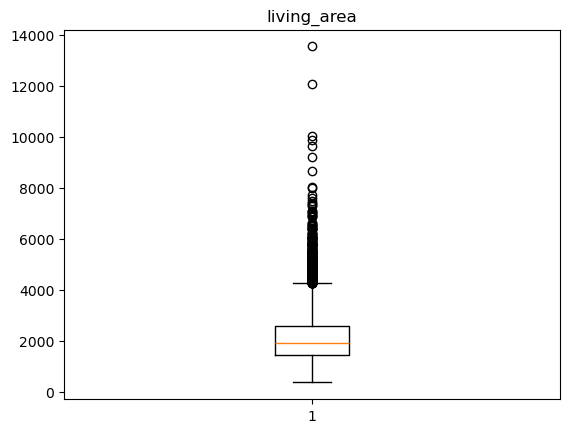

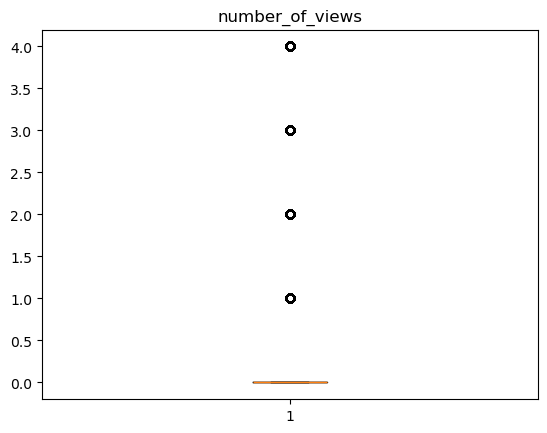

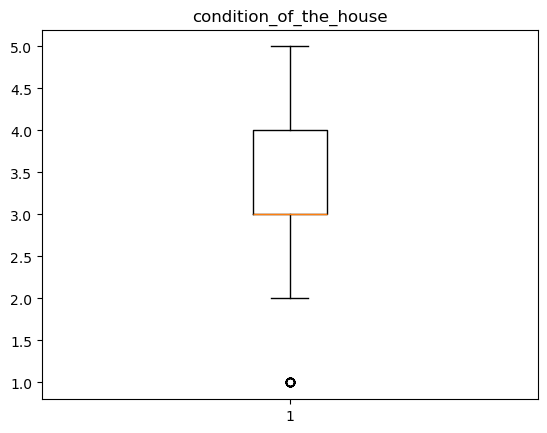

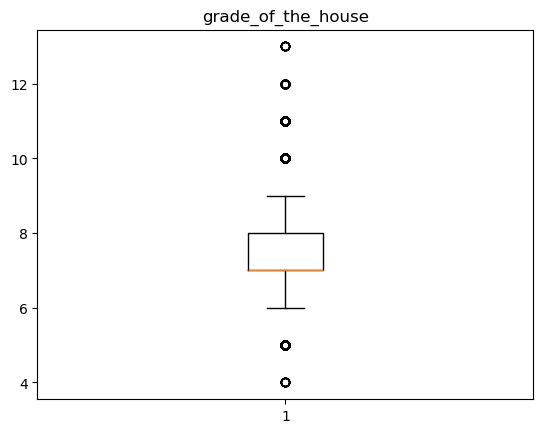

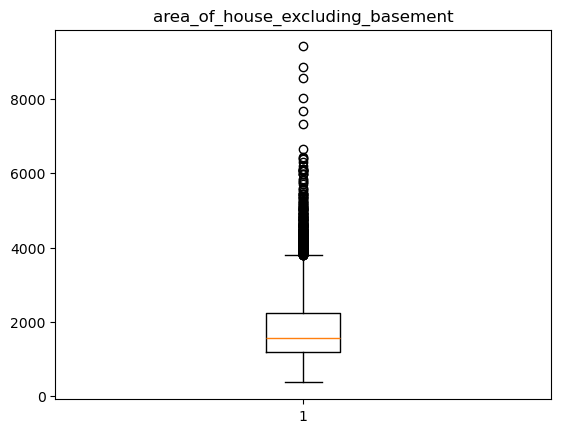

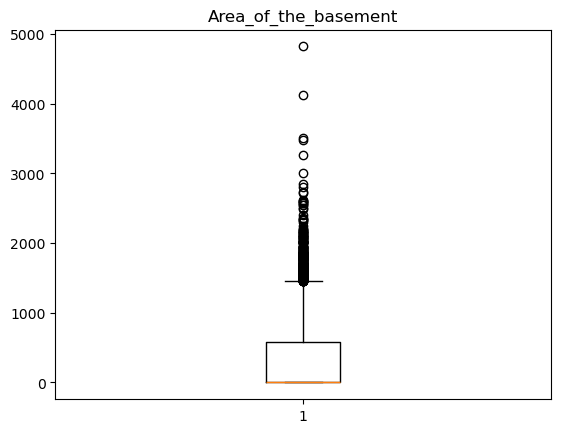

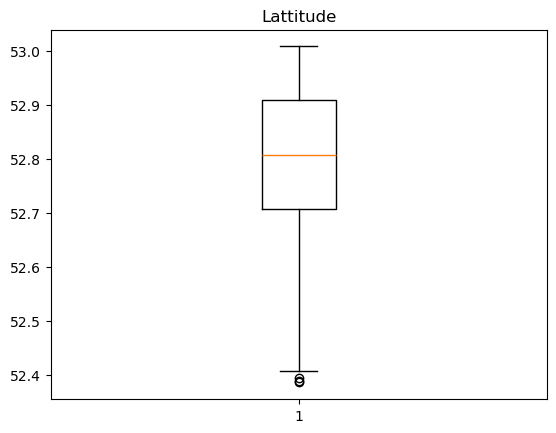

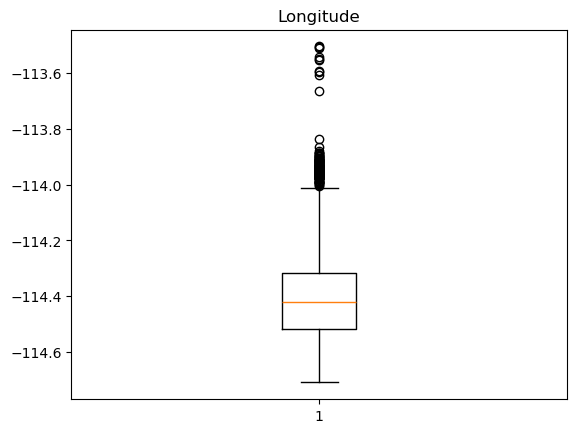

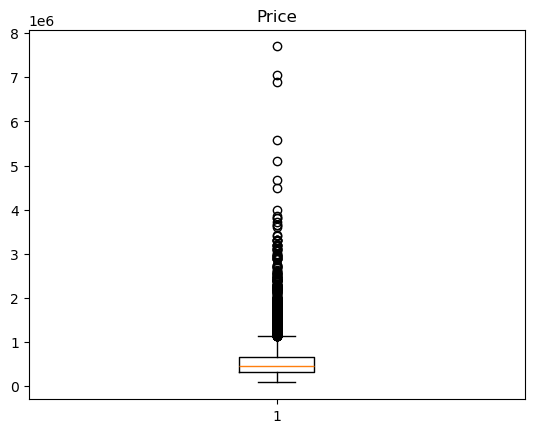

In [45]:
for column in df.columns:
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()

In [46]:
correlation=df.corr()

In [47]:
correlation

,living_area,number_of_views,condition_of_the_house,grade_of_the_house,area_of_house_excluding_basement,Area_of_the_basement,Lattitude,Longitude,Price
living_area,1.000000,0.287431,-0.063646,0.761783,0.875767,0.441537,0.054464,0.240365,0.712276
number_of_views,0.287431,1.000000,0.051791,0.254112,0.162193,0.293317,-0.004734,-0.079411,0.394954
condition_of_the_house,-0.063646,0.051791,1.000000,-0.152898,-0.168052,0.180650,-0.003083,-0.121042,0.040609
grade_of_the_house,0.761783,0.254112,-0.152898,1.000000,0.758161,0.167187,0.115202,0.203935,0.671805
area_of_house_excluding_basement,0.875767,0.162193,-0.168052,0.758161,1.000000,-0.046446,-0.000155,0.346094,0.615179
Area_of_the_basement,0.441537,0.293317,0.180650,0.167187,-0.046446,1.000000,0.112992,-0.145888,0.330499
Lattitude,0.054464,-0.004734,-0.003083,0.115202,-0.000155,0.112992,1.000000,-0.131440,0.297570
Longitude,0.240365,-0.079411,-0.121042,0.203935,0.346094,-0.145888,-0.131440,1.000000,0.024807
Price,0.712276,0.394954,0.040609,0.671805,0.615179,0.330499,0.297570,0.024807,1.000000


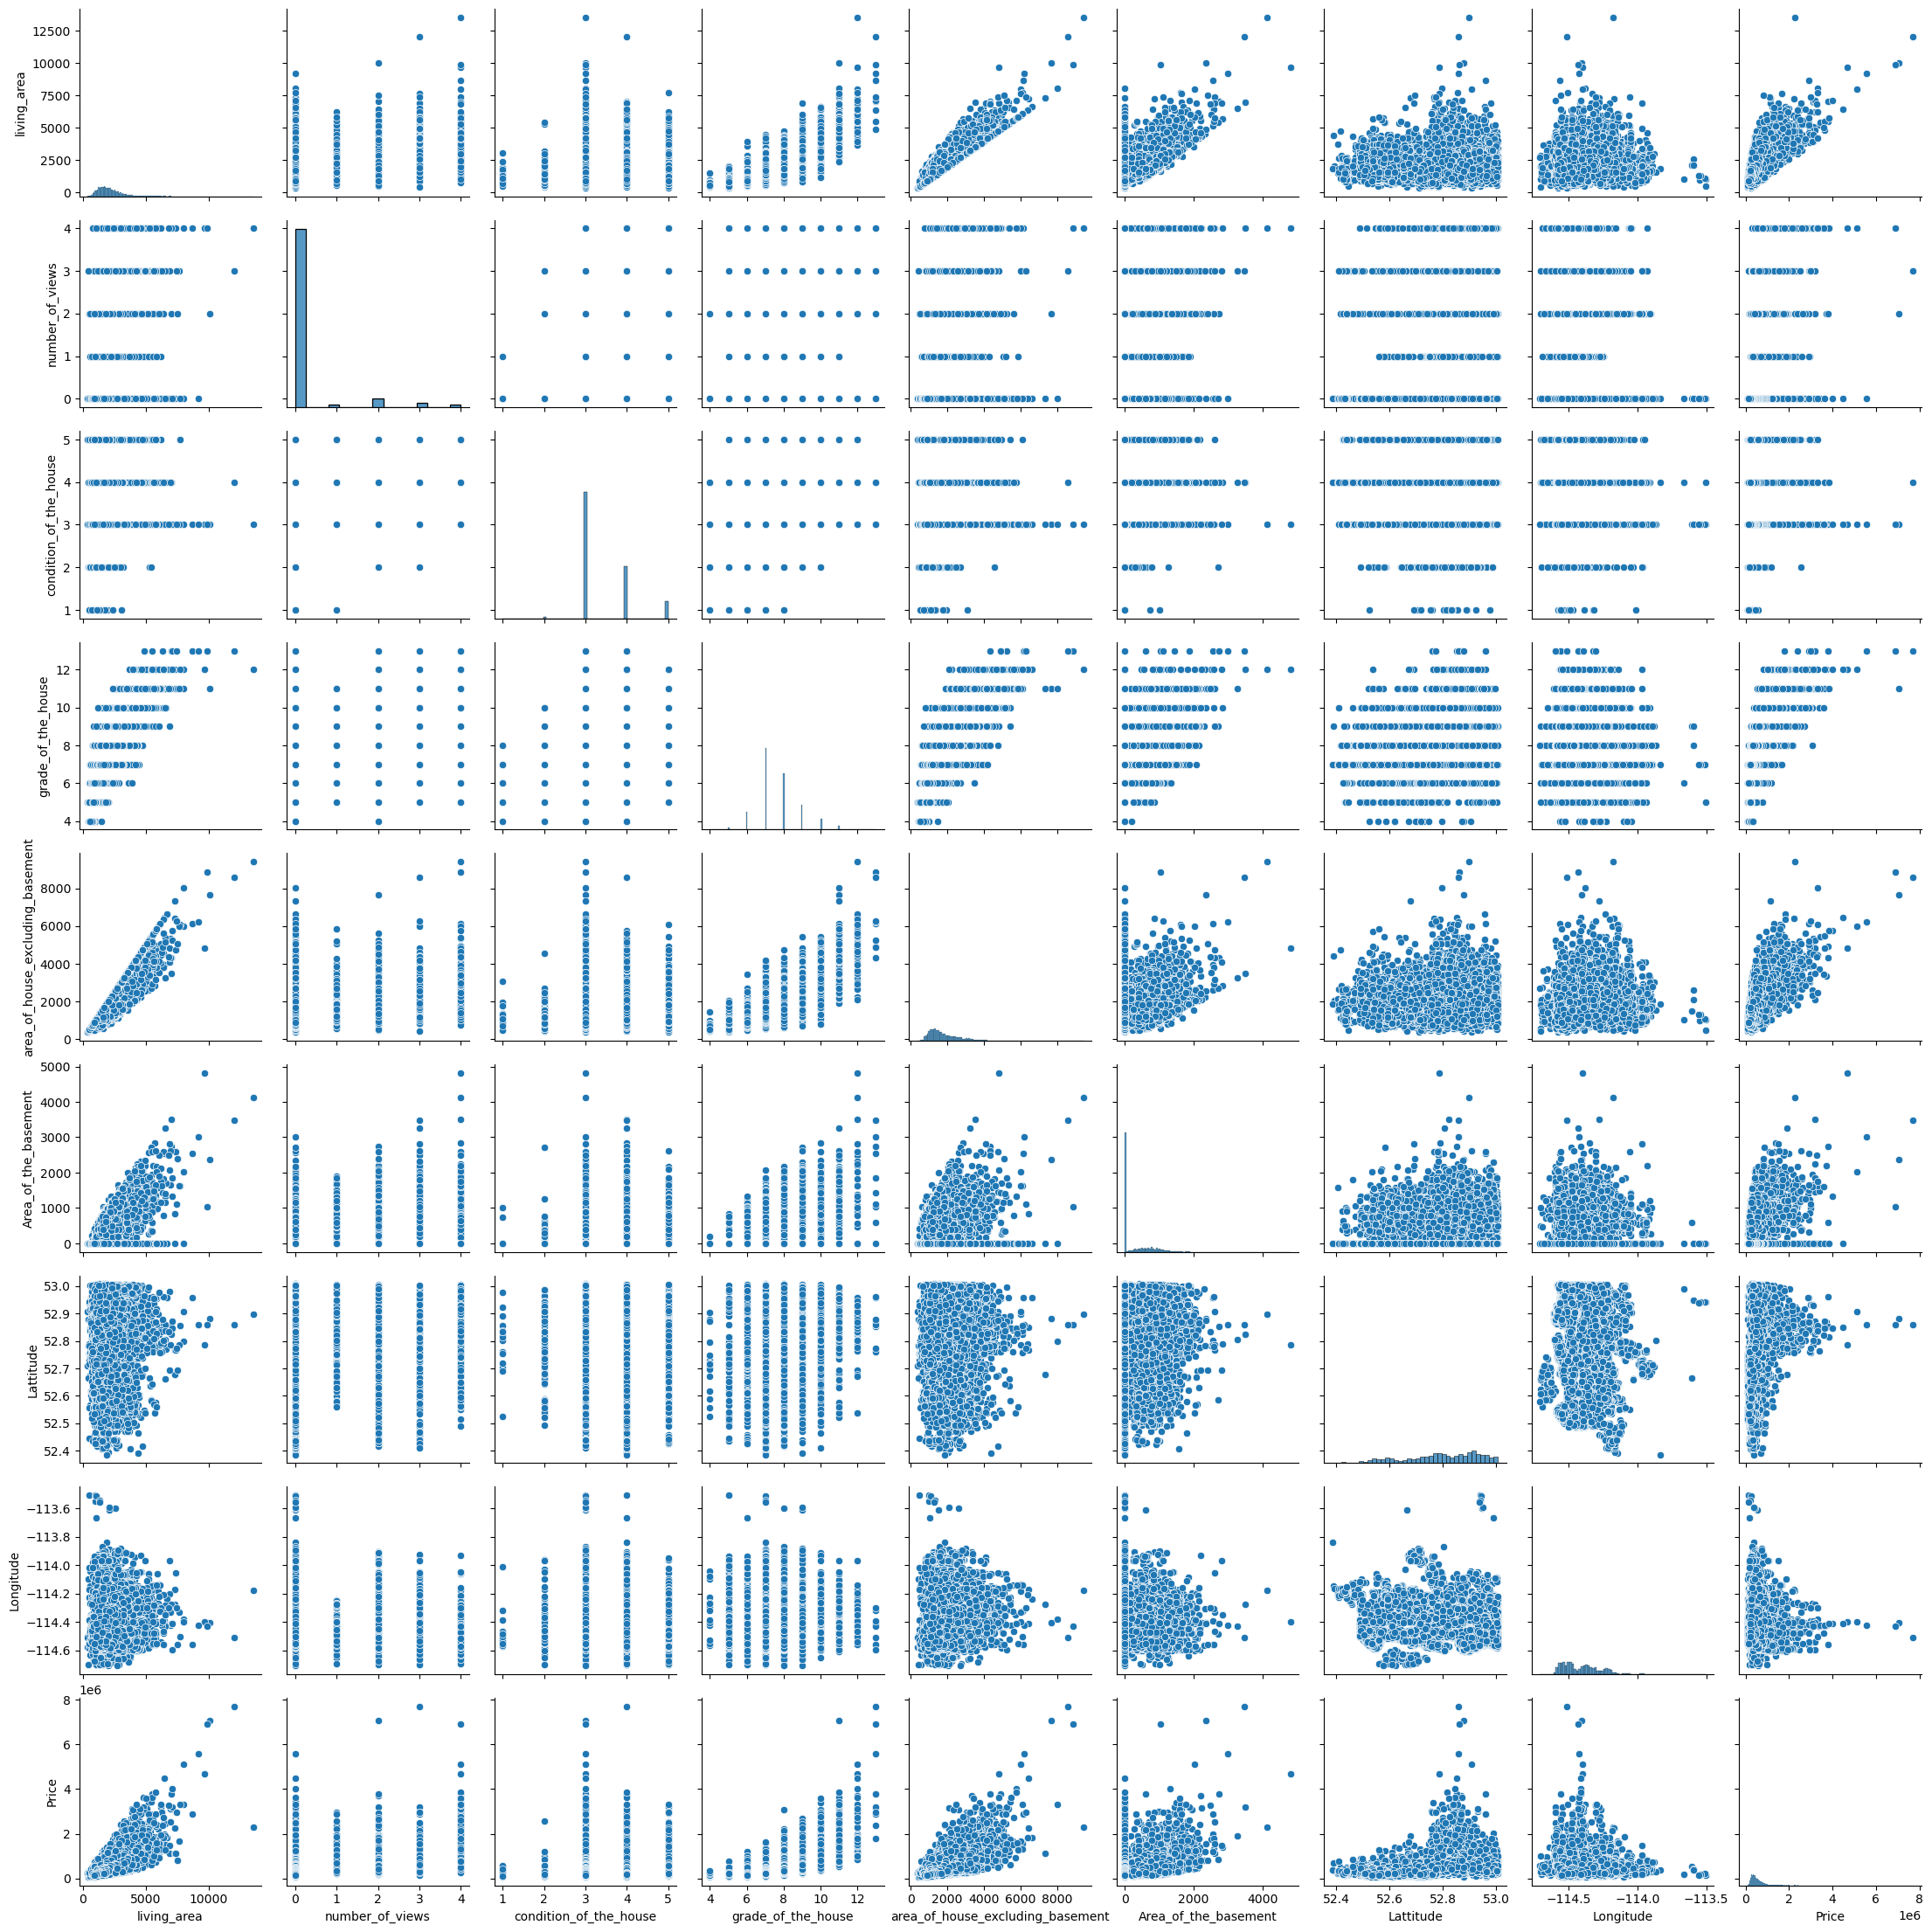

In [48]:
sns.pairplot(df)

<Axes: >

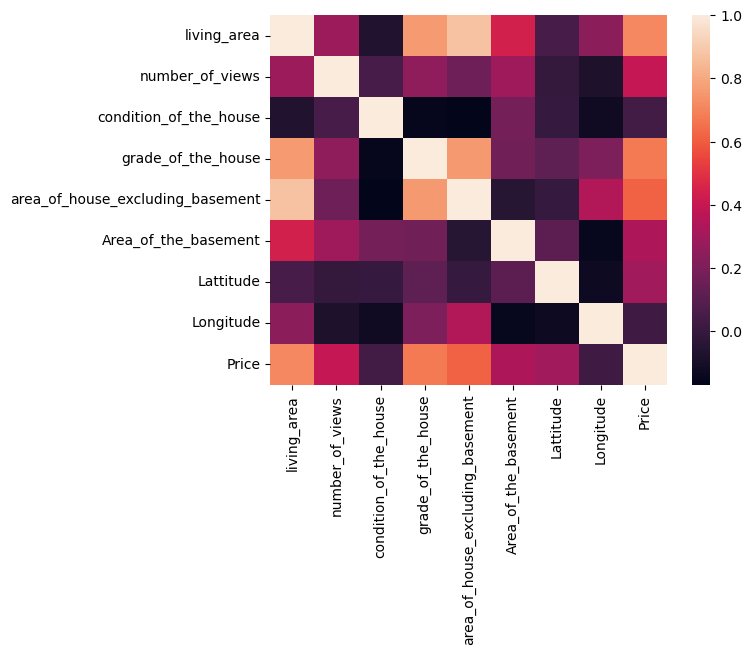

In [49]:
sns.heatmap(correlation)

array([[<Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'number_of_views'}>,
        <Axes: title={'center': 'condition_of_the_house'}>],
       [<Axes: title={'center': 'grade_of_the_house'}>,
        <Axes: title={'center': 'area_of_house_excluding_basement'}>,
        <Axes: title={'center': 'Area_of_the_basement'}>],
       [<Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

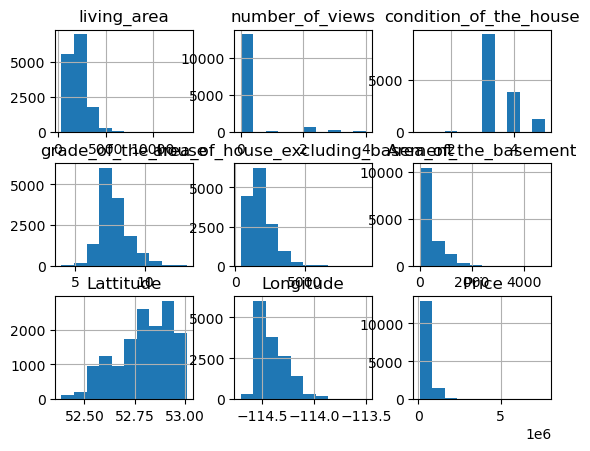

In [50]:
df.hist()

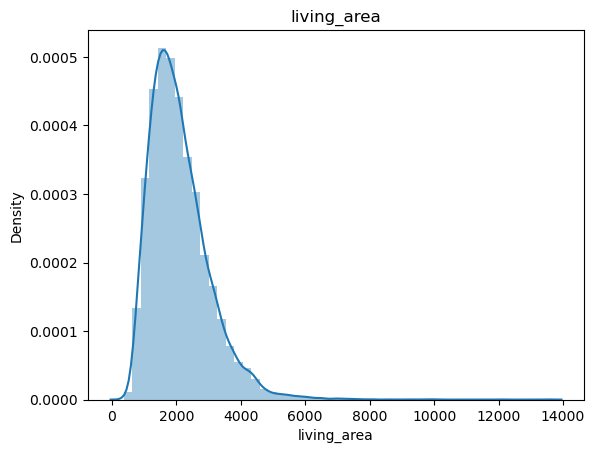

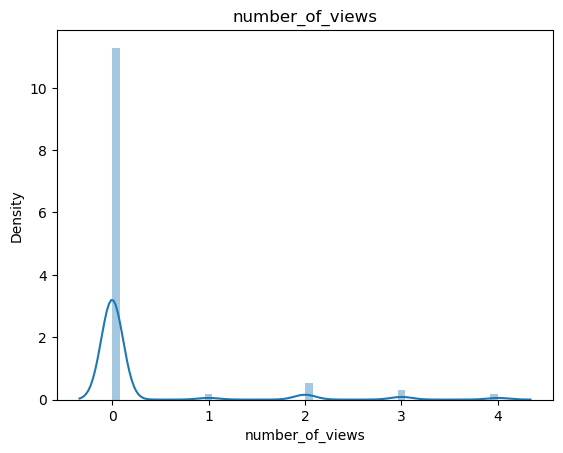

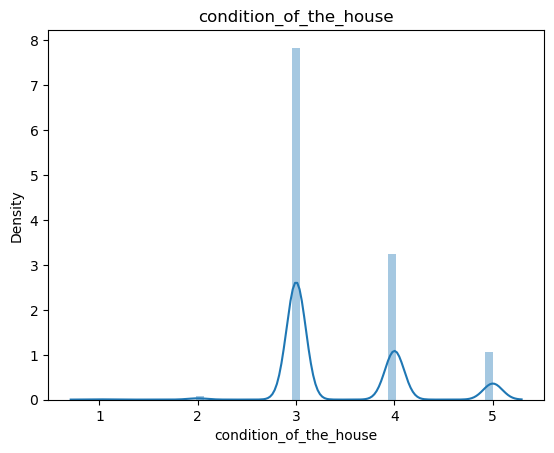

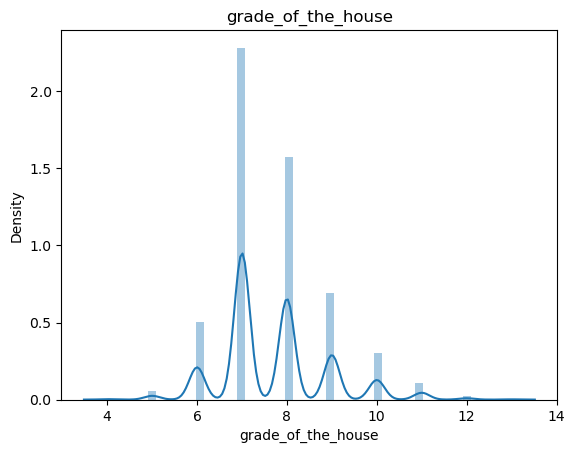

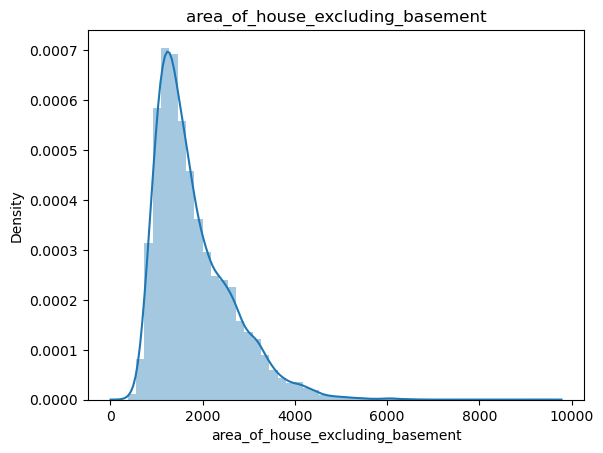

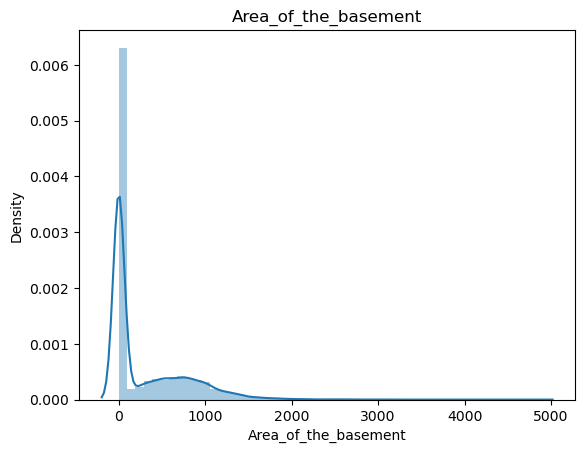

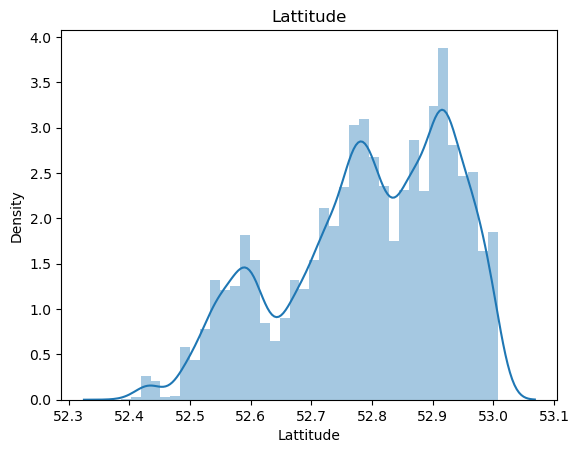

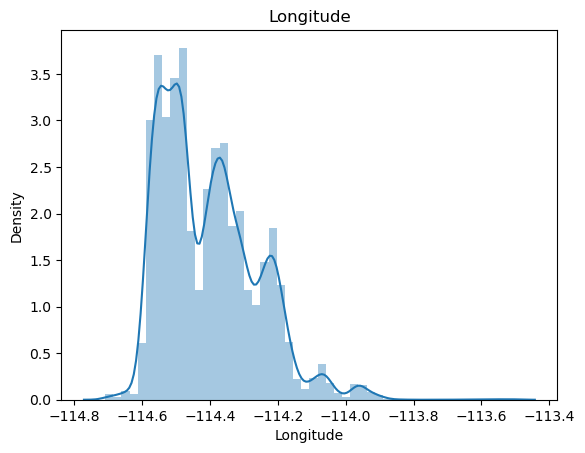

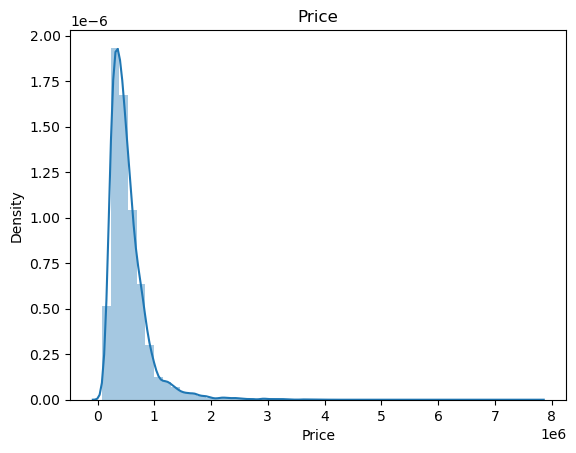

In [51]:
for column in df.columns :
    sns.distplot(df[column])
    plt.title(column)
    plt.show()

#### STANDARDIZATION

In [65]:
X = df.drop("Price",axis=1)

In [66]:
standard_scaler = StandardScaler()
scaled_df = standard_scaler.fit_transform(X)
X = pd.DataFrame(scaled_df,columns=X.columns)

In [67]:
X

,living_area,number_of_views,condition_of_the_house,grade_of_the_house,area_of_house_excluding_basement,Area_of_the_basement,Lattitude,Longitude
0,0.885428,-0.304128,2.363771,0.270443,0.129929,1.590720,0.690494,-0.467051
1,0.874655,-0.304128,-0.648167,0.270443,1.329389,-0.660973,0.671588,-0.452898
2,1.305602,-0.304128,-0.648167,1.121596,1.809172,-0.660973,1.166059,0.587292
3,0.659181,-0.304128,0.857802,0.270443,0.093946,1.189428,0.813385,-0.573192
4,0.540670,-0.304128,0.857802,1.121596,-0.121957,1.345486,0.875921,-1.316186
...,...,...,...,...,...,...,...,...
14614,-0.584103,-0.304128,0.857802,-0.580710,-0.294679,-0.660973,-1.263392,-0.481203
14615,-0.450509,-0.304128,0.857802,-0.580710,-0.145946,-0.660973,-2.074906,0.077811
14616,-1.107704,-0.304128,-0.648167,-1.431864,-0.877616,-0.660973,-0.464967,-0.728867
14617,-1.150799,-0.304128,0.857802,-1.431864,-0.925595,-0.660973,-0.560953,-0.049559


#### SPLITTING DATA

In [68]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=9)

In [71]:
train_x.shape

(10233, 8)

In [72]:
test_x.shape

(4386, 8)

In [73]:
train_y.shape

(10233,)

In [74]:
test_y.shape

(4386,)

### MODEL BUILDING

#### LINEAR REGRESSION MODEL

In [75]:
X.columns

Index(['living_area', 'number_of_views', 'condition_of_the_house',
       'grade_of_the_house', 'area_of_house_excluding_basement',
       'Area_of_the_basement', 'Lattitude', 'Longitude'],
      dtype='object')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   living_area                       14619 non-null  int64  
 1   number_of_views                   14619 non-null  int64  
 2   condition_of_the_house            14619 non-null  int64  
 3   grade_of_the_house                14619 non-null  int64  
 4   area_of_house_excluding_basement  14619 non-null  int64  
 5   Area_of_the_basement              14619 non-null  int64  
 6   Lattitude                         14619 non-null  float64
 7   Longitude                         14619 non-null  float64
 8   Price                             14619 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.0 MB


In [77]:
df.head()

,living_area,number_of_views,condition_of_the_house,grade_of_the_house,area_of_house_excluding_basement,Area_of_the_basement,Lattitude,Longitude,Price
0,2920,0,5,8,1910,1010,52.8878,-114.470,1400000
1,2910,0,3,8,2910,0,52.8852,-114.468,1200000
2,3310,0,3,9,3310,0,52.9532,-114.321,838000
3,2710,0,4,8,1880,830,52.9047,-114.485,805000
4,2600,0,4,9,1700,900,52.9133,-114.590,790000


In [84]:
X

,living_area,number_of_views,condition_of_the_house,grade_of_the_house,area_of_house_excluding_basement,Area_of_the_basement,Lattitude,Longitude
0,0.885428,-0.304128,2.363771,0.270443,0.129929,1.590720,0.690494,-0.467051
1,0.874655,-0.304128,-0.648167,0.270443,1.329389,-0.660973,0.671588,-0.452898
2,1.305602,-0.304128,-0.648167,1.121596,1.809172,-0.660973,1.166059,0.587292
3,0.659181,-0.304128,0.857802,0.270443,0.093946,1.189428,0.813385,-0.573192
4,0.540670,-0.304128,0.857802,1.121596,-0.121957,1.345486,0.875921,-1.316186
...,...,...,...,...,...,...,...,...
14614,-0.584103,-0.304128,0.857802,-0.580710,-0.294679,-0.660973,-1.263392,-0.481203
14615,-0.450509,-0.304128,0.857802,-0.580710,-0.145946,-0.660973,-2.074906,0.077811
14616,-1.107704,-0.304128,-0.648167,-1.431864,-0.877616,-0.660973,-0.464967,-0.728867
14617,-1.150799,-0.304128,0.857802,-1.431864,-0.925595,-0.660973,-0.560953,-0.049559


In [83]:
columns= X.columns
input = "+".join(columns)
linear_model = smf.ols(f"Price~{input}",data=df).fit()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\vishn\anaconda3\Lib\site-packages\patsy\compat.py", line 36, in call_and_wrap_exc
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\vishn\anaconda3\Lib\site-packages\patsy\eval.py", line 169, in eval
    return eval(code, {}, VarLookupDict([inner_namespace]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1, in <module>
  File "C:\Users\vishn\anaconda3\Lib\site-packages\patsy\eval.py", line 52, in __getitem__
    return d[key]
           ~^^^^^
  File "C:\Users\vishn\anaconda3\Lib\site-packages\patsy\eval.py", line 52, in __getitem__
    return d[key]
           ~^^^^^
  File "C:\Users\vishn\anaconda3\Lib\site-packages\pandas\core\indexes\base.py", line 5339, in __getitem__
    result = getitem(key)
             ^^^^^^^^^^^^
IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

The above exception wa

In [ ]:
linear_model.summary()

In [ ]:
print(r2_score(train_y,linear_model.predict(train_x)))

#### RANDOM FOREST MODEL

In [79]:
parameters={
    "n_estimators":[100,200,300],
    "min_samples_split":[3,4,5],

}
random_forest=RandomForestRegressor(n_estimators=100,min_samples_split=5)
randomforest=GridSearchCV(estimator=random_forest,param_grid=parameters,n_jobs=-1)

In [80]:
randomforest.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestRegressor(min_samples_split=5), n_jobs=-1,
             param_grid={'min_samples_split': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [85]:
model=RandomForestRegressor(n_estimators=250,min_samples_split=3)
model.fit(train_x,train_y)

RandomForestRegressor(min_samples_split=3, n_estimators=250)

In [86]:
randomforest.best_params_

{'min_samples_split': 5, 'n_estimators': 100}

In [99]:
model=randomforest.best_estimator_

In [88]:
from sklearn.metrics import r2_score

In [100]:
print(r2_score(train_y,model.predict(train_x)))

0.9694749993351722


#### XGBOOST MODEL

In [90]:
!pip install xgboost

In [95]:
params={
    "n_estimators":[100,150,200,250,270,300],
    "learning_rate":[0.001,0.01,0.0001],
    "min_samples_split":[2,4,5,6],
    "objective":["reg:squarederror"],
    "eval_matric":["rmse"]
}
estimate=xgb.XGBRegressor()
search=GridSearchCV(estimator=estimate,param_grid=params)





In [96]:
estimate.fit(train_x,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [97]:
print(r2_score(test_y,estimate.predict(test_x)))

0.8297373056411743


### training the final model with total dataset

In [101]:
model.fit(X,Y)

RandomForestRegressor(min_samples_split=5)

In [102]:
print(r2_score(train_y,model.predict(train_x)))

0.9704374452122524


In [ ]:
print(r2_score(test_y,model.predict(test_x)))

In [103]:
joblib.dump(estimate,"model.pkl")

['model.pkl']

In [104]:
joblib.dump(standard_scaler,"scaler.pkl")

['scaler.pkl']

In [105]:
inputs={
    "living_area":[2920],
    "number_of_views":[0],
    "condition_of_the_house":[5],
    "grade_of_the_house":[8],
"area_of_house_excluding_basement":[1910],
"Area_of_the_basement":[1010],
"Lattitude":[52.8878],
"Longitude":[-114.470]
}
inputs=pd.DataFrame(inputs)
    

In [106]:
scaler=joblib.load("scaler.pkl")
standard_input=scaler.transform(inputs)

In [107]:
input=pd.DataFrame(standard_input,columns=inputs.columns)

In [108]:
model = joblib.load("model.pkl")
predict=model.predict(inputs)

In [109]:
predict

array([3663151.], dtype=float32)